# Credit Punctuation Model 

Developed by: Emiliano Mena González.

University: Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO).

Degree: Finanacial Engineer.

Semester: 10th.

Date: 20/02/2024

In [1]:
# Libraries and dependencies
import main as m

## Introduction
### Main objective
The main objective of this project is to create a Personal Credit Punctuation Model that classify every record of a dataset on one of three possible scores (Poor, Standard or Good).
### Data
The data we are taking to do the model is the dataset contained in the csv file called "train.csv", this dataset has 28 columns (variables) and 100,000 rows (records). The last column is the Credit_Score that includes the already assigned score of every record. We can see down the first 10 rows of the dataset to see the type of data we have, select what variables we will use to create the model and of this variables which ones need to be cleaned.

In [2]:
m.df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Now we have a table that contains every variable with the type, null values, present values and unique values to see which variables need to be cleaned.

In [3]:
m.data_info

,Type,NA_values,Present_values,Unique_values
Variable_name,,,,
ID,object,0,100000,100000
Customer_ID,object,0,100000,12500
Month,object,0,100000,8
Name,object,9985,90015,10139
Age,object,0,100000,1788
SSN,object,0,100000,12501
Occupation,object,0,100000,16
Annual_Income,object,0,100000,18940
Monthly_Inhand_Salary,float64,15002,84998,13235


### Data cleaning
#### Delete the data it won´t be used
First we selected the variables that we won´t use, this variables were selected because we don´t consider they have significance on the Credit_Score. The variables are:

- ID: It is a descriptive variable of the person.
- Month: It is only a time measure so it doesn´t has a relation with the score.
- Age: We are not considering the Age important to the credit score because it doesn´t matter.
- SSN: Like the ID is only a variable that describes the person.
- Occupation: 
- Num_Bank_Accounts: Credit_Mix variable it already has the info relevant to give the punctuation.
- Num_Credit_Card: Exactly the same as the Num_Bank_Accounts variable.
- Num_of_Loan: Exactly the same as the Num_Bank_Accounts variable.
- Type_of_Loan: Exactly the same as the Num_Bank_Accounts variable.
- Payment_of_Min_Amount: It is not considered because they are other variables that describe better the debt and payment of every person.
- Payment_Behaviour: It doesn´t has a relation to the score so it is not considered.

#### Null values
After deleting the variables we started to fill the null values. To do this it we separated the variables that had null values on the ones we filled the values with the same person info, and the other ones we filled the values with 0. On the next table we have the two groups of variables that were filled.

|Filled with customer info|Filled with 0          |
|-------------------------|-----------------------|
|Name                     |Num_of_Delayed_Payment |
|Annual_Income            |Num_Credit_Inquiries   |
|Monthly_Inhand_Salary    |Amount_invested_monthly|
|Interest_Rate            |Monthly_Balance        |
|Credit_Mix               |                       |
|Credit_History_Age       |                       |

The reason the first variables were filled with the customer info was because it is data that doesn´t change on the pass of the time it was captured the data.

#### Numeric values
The next step on the data cleaning was to change the variables that contain numbers and were on string type data to float type. This variables were:

- Annual_Income 
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Monthly_Balance

#### Change age format
On the final part of the data cleaning was to change the Credit_History_Age variable from a format "NN Years and NN Months" to only the number of months.

#### Data to work with
After all this proccess we had now the dataset cleaned and ready to be used as we can see down.

In [4]:
m.df2.head(10)

,Customer_ID,Name,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,3,7.0,11.27,4.0,Good,809.98,26.822620,319,49.574949,80.415295,312.494089,Good
1,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,-1,0.0,11.27,4.0,Good,809.98,31.944960,319,49.574949,118.280222,284.629162,Good
2,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,3,7.0,0.00,4.0,Good,809.98,28.609352,319,49.574949,81.699521,331.209863,Good
3,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,5,4.0,6.27,4.0,Good,809.98,31.377862,319,49.574949,199.458074,223.451310,Good
4,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,6,0.0,11.27,4.0,Good,809.98,24.797347,319,49.574949,41.420153,341.489231,Good
5,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,8,4.0,9.27,4.0,Good,809.98,27.262259,319,49.574949,62.430172,340.479212,Good
6,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,3,8.0,11.27,4.0,Good,809.98,22.537593,319,49.574949,178.344067,244.565317,Good
7,CUS_0xd40,Rick Rothackerj,19114.12,1824.843333,3,3,6.0,11.27,4.0,Good,809.98,23.933795,319,49.574949,24.785217,358.124168,Standard
8,CUS_0x21b1,Rick Rothackerj,34847.84,3037.986667,6,3,4.0,5.42,2.0,Good,605.03,24.464031,326,18.816215,104.291825,470.690627,Standard
9,CUS_0x21b1,Rick Rothackerj,34847.84,3037.986667,6,7,1.0,7.42,2.0,Good,605.03,38.550848,326,18.816215,40.391238,484.591214,Good


In [5]:
m.data_info_2

,Type,NA_values,Present_values,Unique_values
Variable_name,,,,
Customer_ID,object,0,100000,12500
Name,object,0,100000,9388
Annual_Income,float64,0,100000,12489
Monthly_Inhand_Salary,float64,0,100000,10954
Interest_Rate,int64,0,100000,300
Delay_from_due_date,int64,0,100000,73
Num_of_Delayed_Payment,float64,0,100000,711
Changed_Credit_Limit,float64,0,100000,4383
Num_Credit_Inquiries,float64,0,100000,1223


We can see that we don´t have any null values and we are ready to start the next part of the project.

## Model
### Model bases on FICO model
The model created is a traditional one based principally on the FICO model which has 5 pillars:

1. Payment history: essentially how frequently a borrower makes payments on time. Accounts for missed or late payments.
2. Amounts owed: how much a borrower owes, includes credit card balances, loans, and mortgages.
3. Credit history: how long a borrower has had credit accounts. Including age of their oldest account and the average age of all their accounts.
4. Credit mix: examines types of credit accounts a borrower has—credit cards, loans, and mortgages.
5. New credit: evaluates the number of recently opened credit accounts and credit applications. 
Also looks at the borrower’s overall credit history.

It is not known for sure how they are weighted every one of this pillars on the final score of the model, but lot of sources say that the distribution is the next:

|Pillar                  |Percentage|
|------------------------|----------|
|Payment history         |35%       |
|Amounts owed            |30%       |
|Length of credit history|15%       |
|Credit mix              |10%       |
|New credit              |10%       |

To the developed model the pillars are almost the same but with the adittion of a sixth one. This pillar is the Credit utilization, this is important because if a person is using properly his credit line it could be increased and vice versa. Below we can see the final conformation of the pillars and the variables selected for the model structure:

|**Pillar**             |**Percentage**|**Variables**           |
|:---------------------:|:------------:|:----------------------:|
|Payment history        |30%           |Delay_from_due_date     |
|                       |              |Num_of_Delayed_Payment  |
|                       |              |Total_EMI_per_month     |
|Amounts owed           |20%           |Outstanding_Debt        |
|Lengh of credit history|15%           |Credit_History_Age      |
|Credit mix             |10%           |Credit_Mix              |  
|New credit             |15%           |Changed_Credit_Limit    |
|                       |              |Num_Credit_Inquiries    |
|Credit utilization     |10%           |Credit_Utilization_Ratio|

In [6]:
m.results

,Customer_ID,Name,Model_Punctuation,Model_Score,Original_Score
0,CUS_0xd40,Rick Rothackerj,866.25,Good,Good
1,CUS_0xd40,Rick Rothackerj,886.25,Good,Good
2,CUS_0xd40,Rick Rothackerj,866.25,Good,Good
3,CUS_0xd40,Rick Rothackerj,841.25,Good,Good
4,CUS_0xd40,Rick Rothackerj,861.25,Good,Good
...,...,...,...,...,...
99995,CUS_0x942c,Nicks,816.25,Good,Poor
99996,CUS_0x942c,Nicks,766.25,Standard,Poor
99997,CUS_0x942c,Nicks,766.25,Standard,Poor
99998,CUS_0x942c,Nicks,836.25,Good,Standard


In [7]:
m.accuracy

0.54658

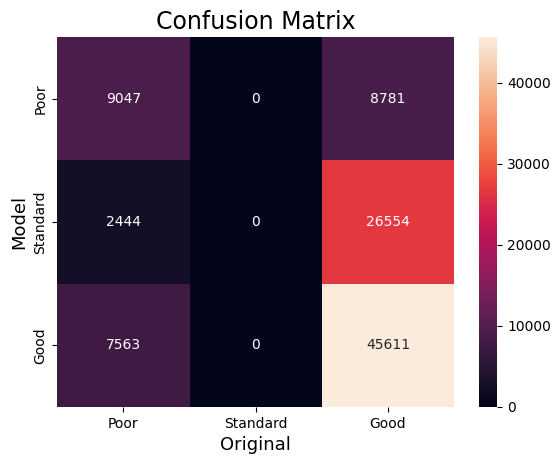

In [8]:
from visualizations import graph1;

## Conclusions